# 🥬 Kalimati Tarkari Dataset: Fruits & Vegetables Price Analysis

## 📊 About Dataset

### **Kalimati Tarkari Dataset**
This comprehensive dataset contains historical price data for fruits and vegetables from the **Kalimati Fruits and Vegetable Market Development Board**, Nepal's largest wholesale market for agricultural produce. The data has been meticulously scraped from the official website: [https://kalimatimarket.gov.np/](https://kalimatimarket.gov.np/)

The dataset captures daily minimum, maximum, and average prices for a wide variety of commodities, providing valuable insights into market trends, seasonal variations, and price dynamics in Nepal's agricultural sector.

📦 **Dataset Source**: [Kaggle - Kalimati Tarkari Dataset](https://www.kaggle.com/datasets/nischallal/kalimati-tarkari-dataset)

---

## 🌟 Context

The Kalimati Market serves as the primary wholesale hub for fruits and vegetables in Nepal, directly influencing retail prices across the country. Understanding price patterns in this market is crucial for:

- **Farmers** seeking optimal selling times for their produce
- **Retailers** planning inventory and pricing strategies  
- **Policymakers** monitoring food security and inflation
- **Consumers** understanding seasonal price fluctuations
- **Researchers** analyzing agricultural economics and supply chain dynamics

This dataset represents years of daily price records, capturing the pulse of Nepal's agricultural market and offering a window into the economic realities of food distribution in South Asia.

---

## 📦 Content

The dataset includes:

- **280,000+ records** spanning multiple years of daily price data
- **Multiple commodity categories**: Vegetables (tomatoes, potatoes, leafy greens, etc.), Fruits (bananas, mangoes, apples, etc.), and specialty items
- **Price metrics**: Minimum, Maximum, and Average prices per unit (Kg/Dozen/Piece)
- **Temporal data**: Date-wise records enabling time series analysis
- **Unit specifications**: Clear measurement units for each commodity

### Key Features:
- Daily price updates for 70+ different commodities
- Seasonal variation patterns across different produce types
- Price volatility indicators through min-max spreads
- Historical trends for forecasting and predictive modeling

---

## 🙏 Acknowledgements

We extend our sincere gratitude to:

- **Kalimati Fruits and Vegetable Market Development Board** for maintaining transparent and accessible price records
- The **Government of Nepal** for supporting agricultural market information systems
- **Open data initiatives** that make agricultural market data publicly available for research and analysis

This dataset would not be possible without the continuous efforts of market officials who diligently record and publish daily price information, contributing to market transparency and informed decision-making.

---

## 💡 Inspiration & Research Questions

This dataset opens doors to numerous analytical opportunities:

### 📈 Time Series Analysis:
- Can we predict future prices based on historical trends?
- What are the seasonal patterns for different commodities?
- How do prices fluctuate during festivals and special occasions?

### 🔍 Market Insights:
- Which commodities show the highest price volatility?
- How do local vs. imported produce prices compare?
- What is the relationship between minimum and maximum prices?

### 🌾 Economic Analysis:
- How do weather patterns affect vegetable prices?
- What is the impact of supply chain disruptions on prices?
- Can we identify inflationary trends in food prices?

### 🤖 Machine Learning Applications:
- Price forecasting models for different commodities
- Anomaly detection in price patterns
- Clustering analysis of similar price behaviors

---

**Let's explore the data and uncover the stories hidden in Nepal's agricultural market!** 🚀

---

## 👤 Author

**Sajjad Ali Shah**  
Data Scientist | Machine Learning Engineer  
🔗 [LinkedIn Profile](https://www.linkedin.com/in/sajjad-ali-shah47/)

*Feel free to connect for collaborations, discussions, or questions about this analysis!*

## 🔗 Dataset Source

📦 **Kaggle**: [Kalimati Tarkari Dataset](https://www.kaggle.com/datasets/nischallal/kalimati-tarkari-dataset)

Access the complete dataset on Kaggle for your analysis and research.

---

# 🔄 Time Series Analysis Workflow

Following a systematic approach for time series analysis:
1. 📥 **Data Collection** - Load the dataset
2. 📅 **Datetime Handling** - Convert and parse date columns
3. 🔍 **Initial Data Inspection** - Understand data structure
4. ❓ **Missing Values Check** - Identify temporal gaps
5. 📊 **Resampling** (if needed) - Standardize time intervals
6. 📈 **Exploratory Data Analysis** - Discover patterns and trends

---

## Step 1️⃣: Data Collection

Loading the Kalimati Tarkari dataset for time series analysis.

In [2]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# load the dataset
df=pd.read_csv('Dataset/Kalimati_Tarkari_Dataset.csv', low_memory=False)

# Convert price columns to numeric, handling any non-numeric values
df['Minimum'] = pd.to_numeric(df['Minimum'], errors='coerce')
df['Maximum'] = pd.to_numeric(df['Maximum'], errors='coerce')
df['Average'] = pd.to_numeric(df['Average'], errors='coerce')

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows, {df.shape[1]} columns")

✅ Dataset loaded successfully!
Shape: 280,862 rows, 6 columns


In [5]:
# Check unique unit values BEFORE standardization
print("=" * 100)
print("📦 UNIT VALUES - BEFORE STANDARDIZATION")
print("=" * 100)
print(f"\nUnique Unit Values:")
print(df['Unit'].value_counts())

# Standardize unit names to consistent format
print("\n" + "=" * 100)
print("🔧 STANDARDIZING UNIT NAMES")
print("=" * 100)

# Create a mapping for unit standardization
unit_mapping = {
    'Kg': 'Kg',
    'KG': 'Kg',
    'kg': 'Kg',
    'Doz': 'Dozen',
    'Per Dozen': 'Dozen',
    '1 Pc': 'Piece',
    'Per Piece': 'Piece',
    'Pc': 'Piece'
}

# Apply the standardization
df['Unit'] = df['Unit'].replace(unit_mapping)

print("\n✅ Unit names standardized successfully!")
print("\nStandardization mapping applied:")
for old_unit, new_unit in unit_mapping.items():
    if old_unit != new_unit:
        print(f"   • '{old_unit}' → '{new_unit}'")

# Check unique unit values AFTER standardization
print("\n" + "=" * 100)
print("📦 UNIT VALUES - AFTER STANDARDIZATION")
print("=" * 100)
print(f"\nUnique Unit Values:")
print(df['Unit'].value_counts())
print(f"\n✅ Reduced to {df['Unit'].nunique()} standardized unit types!")

📦 UNIT VALUES - BEFORE STANDARDIZATION

Unique Unit Values:
Unit
Kg       273076
Piece      4182
Dozen      3604
Name: count, dtype: int64

🔧 STANDARDIZING UNIT NAMES

✅ Unit names standardized successfully!

Standardization mapping applied:
   • 'KG' → 'Kg'
   • 'kg' → 'Kg'
   • 'Doz' → 'Dozen'
   • 'Per Dozen' → 'Dozen'
   • '1 Pc' → 'Piece'
   • 'Per Piece' → 'Piece'
   • 'Pc' → 'Piece'

📦 UNIT VALUES - AFTER STANDARDIZATION

Unique Unit Values:
Unit
Kg       273076
Piece      4182
Dozen      3604
Name: count, dtype: int64

✅ Reduced to 3 standardized unit types!


---

## Step 2️⃣: Datetime Handling

Converting date columns to proper datetime format and extracting temporal features.

In [7]:
# Convert Date column to datetime format
print("=" * 100)
print("📅 DATETIME HANDLING")
print("=" * 100)

# Check original date format
print(f"\n🔍 Original Date Column:")
print(f"Data Type: {df['Date'].dtype}")
print(f"Sample values:\n{df['Date'].head()}")

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False)

print(f"\n✅ After Conversion:")
print(f"Data Type: {df['Date'].dtype}")
print(f"Sample values:\n{df['Date'].head()}")

# Extract temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter
df['Week_of_Year'] = df['Date'].dt.isocalendar().week

print(f"\n📊 Date Range:")
print(f"Start Date: {df['Date'].min().strftime('%Y-%m-%d')}")
print(f"End Date: {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total Days: {(df['Date'].max() - df['Date'].min()).days:,}")
print(f"Total Years: {(df['Date'].max() - df['Date'].min()).days / 365.25:.2f}")

print(f"\n✅ New Temporal Features Created:")
print(f"   • Year, Month, Month_Name, Day")
print(f"   • Day_of_Week, Quarter, Week_of_Year")

📅 DATETIME HANDLING

🔍 Original Date Column:
Data Type: datetime64[ns]
Sample values:
0   2013-06-16
1   2013-06-16
2   2013-06-16
3   2013-06-16
4   2013-06-16
Name: Date, dtype: datetime64[ns]

✅ After Conversion:
Data Type: datetime64[ns]
Sample values:
0   2013-06-16
1   2013-06-16
2   2013-06-16
3   2013-06-16
4   2013-06-16
Name: Date, dtype: datetime64[ns]

📊 Date Range:
Start Date: 2013-06-16
End Date: 2023-09-28
Total Days: 3,756
Total Years: 10.28

✅ New Temporal Features Created:
   • Year, Month, Month_Name, Day
   • Day_of_Week, Quarter, Week_of_Year


---

## Step 3️⃣: Initial Data Inspection

Understanding the structure and basic characteristics of the time series data.

In [8]:
# Dataset Overview
print("=" * 100)
print("📊 DATASET INFORMATION")
print("=" * 100)
df.info()

print("\n" + "=" * 100)
print("📐 DATASET SHAPE")
print("=" * 100)
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

print("\n" + "=" * 100)
print("🔍 FIRST 5 ROWS")
print("=" * 100)
print(df.head())

print("\n" + "=" * 100)
print("📈 STATISTICAL SUMMARY")
print("=" * 100)
print(df.describe())

print("\n" + "=" * 100)
print("🔎 MISSING VALUES")
print("=" * 100)
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("✅ No missing values found!")

print("\n" + "=" * 100)
print("📊 DUPLICATE ROWS")
print("=" * 100)
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")
if duplicates == 0:
    print("✅ No duplicate rows found!")

print("\n" + "=" * 100)
print("🏷️ UNIQUE VALUES PER COLUMN")
print("=" * 100)
for col in df.columns:
    print(f"{col}: {df[col].nunique():,} unique values")

📊 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280862 entries, 0 to 280861
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Commodity     280862 non-null  object        
 1   Date          280862 non-null  datetime64[ns]
 2   Unit          280862 non-null  object        
 3   Minimum       229706 non-null  float64       
 4   Maximum       229706 non-null  float64       
 5   Average       229706 non-null  float64       
 6   Year          280862 non-null  int32         
 7   Month         280862 non-null  int32         
 8   Month_Name    280862 non-null  object        
 9   Day           280862 non-null  int32         
 10  Day_of_Week   280862 non-null  object        
 11  Quarter       280862 non-null  int32         
 12  Week_of_Year  280862 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(4), object(4)
memory usage: 22.8+ MB

📐 DATASE

---

## Step 4️⃣: Missing Values in Time Series

Identifying temporal gaps and missing data points in the time series.

In [9]:
# Time Series Missing Values Analysis
print("=" * 100)
print("❓ MISSING VALUES IN TIME SERIES")
print("=" * 100)

# 1. Check for missing values in columns
print("\n📊 Missing Values by Column:")
print("-" * 100)
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing %': missing_percent.values
})
print(missing_df[missing_df['Missing Count'] > 0].to_string(index=False) if missing_df['Missing Count'].sum() > 0 else "✅ No missing values in columns!")

# 2. Check for temporal gaps (missing dates)
print("\n" + "=" * 100)
print("📅 Temporal Continuity Check:")
print("-" * 100)

# Sort by date
df_sorted = df.sort_values('Date')

# Get all unique dates
unique_dates = df_sorted['Date'].unique()
date_range = pd.date_range(start=df_sorted['Date'].min(), end=df_sorted['Date'].max(), freq='D')

missing_dates = date_range.difference(pd.DatetimeIndex(unique_dates))

print(f"Expected date range: {len(date_range):,} days")
print(f"Actual unique dates: {len(unique_dates):,} days")
print(f"Missing dates: {len(missing_dates):,} days")

if len(missing_dates) > 0:
    print(f"\n⚠️ Found {len(missing_dates)} missing dates in the time series")
    print(f"First 10 missing dates:")
    for date in missing_dates[:10]:
        print(f"  • {date.strftime('%Y-%m-%d')}")
else:
    print("\n✅ No temporal gaps found - continuous daily data!")

# 3. Check data frequency
print("\n" + "=" * 100)
print("📊 Time Series Frequency Analysis:")
print("-" * 100)
print(f"Total Records: {len(df):,}")
print(f"Unique Commodities: {df['Commodity'].nunique()}")
print(f"Records per Commodity (average): {len(df) / df['Commodity'].nunique():.2f}")

# 4. Check for irregular spacing
print("\n" + "=" * 100)
print("📈 Data Distribution Over Time:")
print("-" * 100)
records_per_year = df.groupby('Year').size()
print(records_per_year)

print("\n✅ Missing values analysis complete!")

❓ MISSING VALUES IN TIME SERIES

📊 Missing Values by Column:
----------------------------------------------------------------------------------------------------
 Column  Missing Count  Missing %
Minimum          51156  18.213927
Maximum          51156  18.213927
Average          51156  18.213927

📅 Temporal Continuity Check:
----------------------------------------------------------------------------------------------------
Expected date range: 3,757 days
Actual unique dates: 3,615 days
Missing dates: 142 days

⚠️ Found 142 missing dates in the time series
First 10 missing dates:
  • 2013-06-22
  • 2013-06-23
  • 2013-06-24
  • 2013-06-29
  • 2013-07-06
  • 2013-07-07
  • 2013-07-08
  • 2013-07-13
  • 2013-07-20
  • 2013-07-27

📊 Time Series Frequency Analysis:
----------------------------------------------------------------------------------------------------
Total Records: 280,862
Unique Commodities: 136
Records per Commodity (average): 2065.16

📈 Data Distribution Over Time:
------

---

## Step 5️⃣: Resampling (If Needed)

Checking if resampling is required and standardizing time intervals if necessary.

In [10]:
# Resampling Analysis
print("=" * 100)
print("📊 RESAMPLING ANALYSIS")
print("=" * 100)

# Check current frequency
print(f"\n🔍 Current Data Frequency:")
print(f"   • Data appears to be DAILY (one record per commodity per day)")
print(f"   • Multiple commodities tracked simultaneously")

# Example: Resample one commodity to different frequencies
sample_commodity = df['Commodity'].value_counts().index[0]
commodity_data = df[df['Commodity'] == sample_commodity].set_index('Date').sort_index()

print(f"\n📈 Sample Resampling for '{sample_commodity}':")
print("-" * 100)

# Daily (current)
print(f"\n1️⃣ Daily Frequency (Current):")
print(f"   Records: {len(commodity_data)}")
print(f"   Sample:\n{commodity_data[['Average']].head()}")

# Weekly resampling
weekly = commodity_data[['Minimum', 'Maximum', 'Average']].resample('W').mean()
print(f"\n2️⃣ Weekly Resampling (Mean prices):")
print(f"   Records: {len(weekly)}")
print(f"   Sample:\n{weekly.head()}")

# Monthly resampling
monthly = commodity_data[['Minimum', 'Maximum', 'Average']].resample('M').mean()
print(f"\n3️⃣ Monthly Resampling (Mean prices):")
print(f"   Records: {len(monthly)}")
print(f"   Sample:\n{monthly.head()}")

print(f"\n💡 Resampling Options:")
print(f"   • Daily (D) - Current frequency ✅")
print(f"   • Weekly (W) - For weekly trend analysis")
print(f"   • Monthly (M) - For long-term patterns")
print(f"   • Quarterly (Q) - For seasonal analysis")

print(f"\n📌 Decision: Keep DAILY frequency for detailed analysis")
print(f"   (Can resample later for specific visualizations or modeling)")

print("\n✅ Resampling analysis complete!")

📊 RESAMPLING ANALYSIS

🔍 Current Data Frequency:
   • Data appears to be DAILY (one record per commodity per day)
   • Multiple commodities tracked simultaneously

📈 Sample Resampling for 'Cauli Local':
----------------------------------------------------------------------------------------------------

1️⃣ Daily Frequency (Current):
   Records: 3612
   Sample:
            Average
Date               
2013-06-16     32.5
2013-06-17     27.5
2013-06-18     27.5
2013-06-19     27.5
2013-06-20     22.5

2️⃣ Weekly Resampling (Mean prices):
   Records: 538
   Sample:
            Minimum  Maximum  Average
Date                                 
2013-06-16     30.0     35.0     32.5
2013-06-23     23.0     27.8     25.4
2013-06-30     23.6     29.4     26.5
2013-07-07     35.0     40.0     37.5
2013-07-14     47.0     54.0     50.5

3️⃣ Monthly Resampling (Mean prices):
   Records: 124
   Sample:
              Minimum    Maximum    Average
Date                                       
2013-06-30 

---

## Step 6️⃣: Exploratory Data Analysis (EDA)

Now that we have a clean, well-structured time series dataset, let's explore patterns, trends, and insights through comprehensive analysis.

### 📅 Temporal Distribution Analysis
Understanding how data is distributed across time periods.

In [11]:
# Temporal Distribution Analysis
print("=" * 100)
print("📅 TEMPORAL DISTRIBUTION ANALYSIS")
print("=" * 100)

print(f"\n📆 Date Range Summary:")
print(f"   Start Date: {df['Date'].min().strftime('%Y-%m-%d')}")
print(f"   End Date: {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"   Total Days: {(df['Date'].max() - df['Date'].min()).days:,}")
print(f"   Total Years: {(df['Date'].max() - df['Date'].min()).days / 365.25:.2f}")

print(f"\n📊 Records Per Year:")
print("-" * 100)
year_counts = df['Year'].value_counts().sort_index()
for year, count in year_counts.items():
    print(f"{year}: {count:7,} records")

print(f"\n📊 Records Per Month:")
print("-" * 100)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['Month_Name'].value_counts().reindex(month_order)
for month, count in month_counts.items():
    print(f"{month:12}: {count:7,} records")

print(f"\n📊 Records Per Day of Week:")
print("-" * 100)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Day_of_Week'].value_counts().reindex(day_order)
for day, count in day_counts.items():
    print(f"{day:12}: {count:7,} records")

print("\n✅ Temporal distribution analysis complete!")

📅 TEMPORAL DISTRIBUTION ANALYSIS

📆 Date Range Summary:
   Start Date: 2013-06-16
   End Date: 2023-09-28
   Total Days: 3,756
   Total Years: 10.28

📊 Records Per Year:
----------------------------------------------------------------------------------------------------
2013:  10,896 records
2014:  22,170 records
2015:  25,084 records
2016:  25,596 records
2017:  24,124 records
2018:  23,295 records
2019:  26,197 records
2020:  26,622 records
2021:  34,685 records
2022:  35,084 records
2023:  27,109 records

📊 Records Per Month:
----------------------------------------------------------------------------------------------------
January     :  24,715 records
February    :  22,520 records
March       :  23,965 records
April       :  22,909 records
May         :  22,651 records
June        :  23,315 records
July        :  24,565 records
August      :  24,159 records
September   :  23,524 records
October     :  21,391 records
November    :  22,737 records
December    :  24,411 records

📊 R

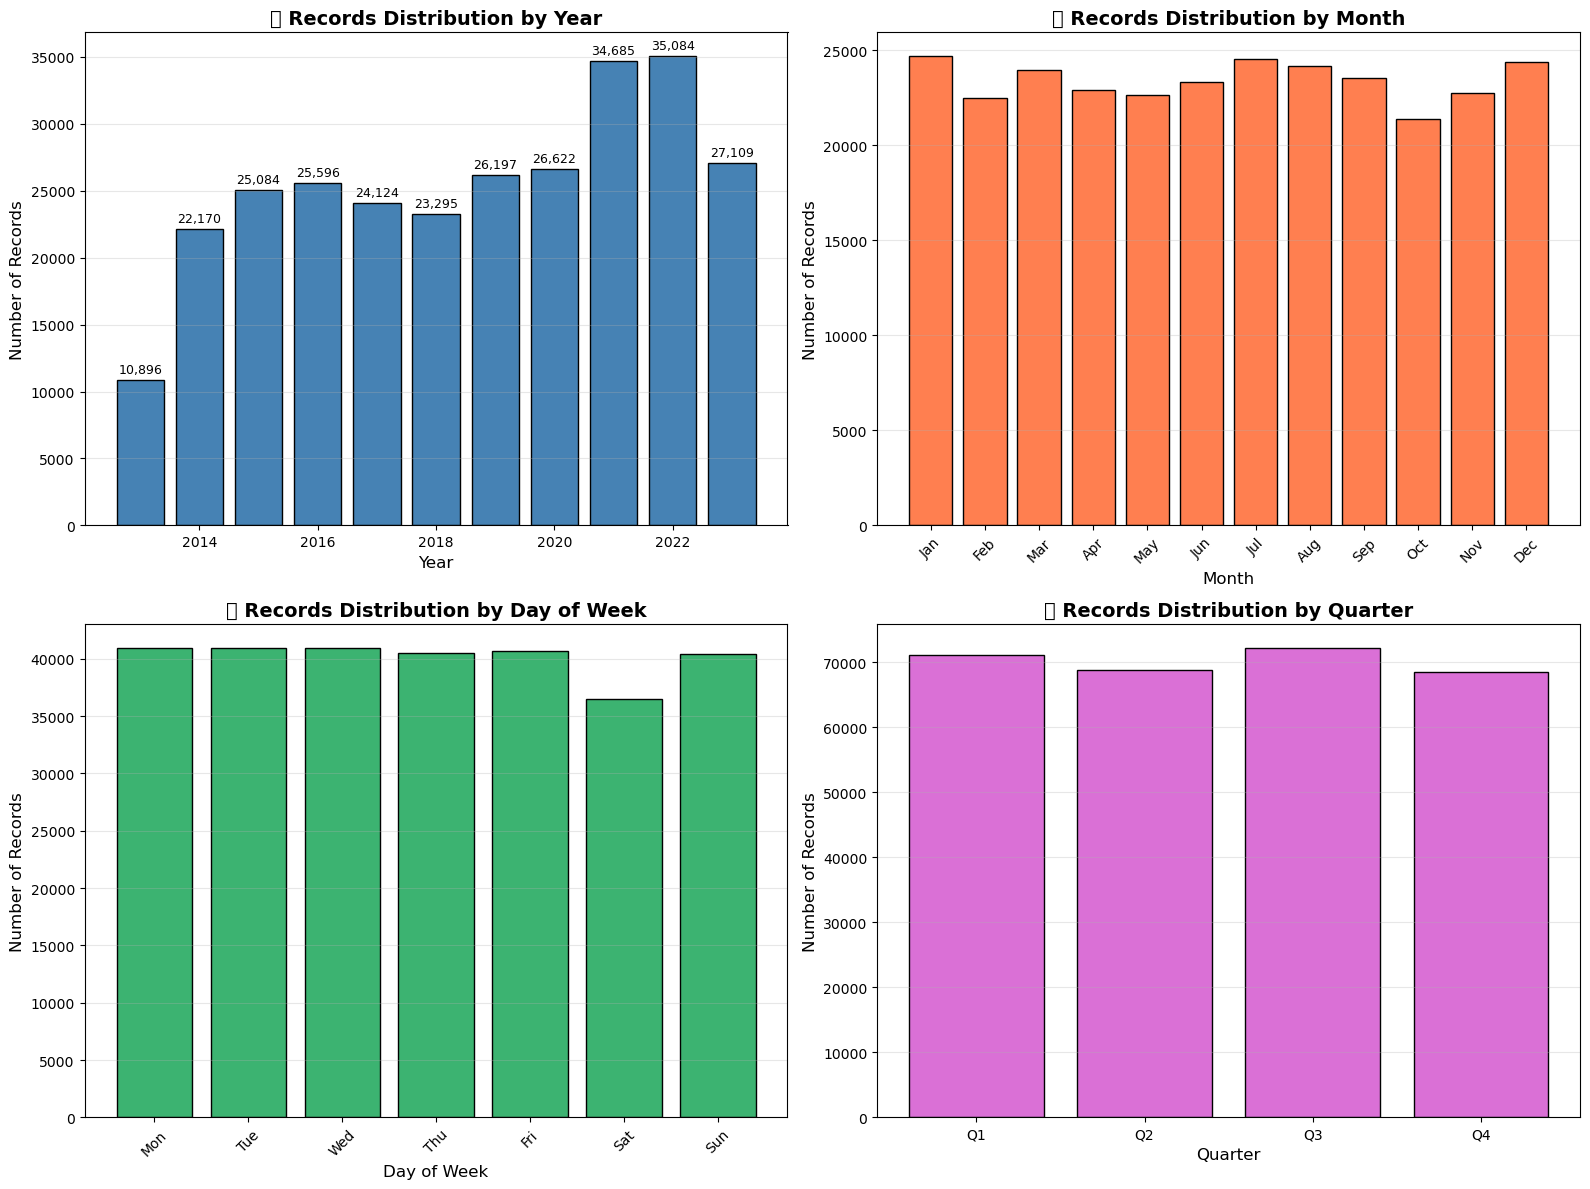

In [12]:
# Visualization 1: Records Distribution by Year
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Records per Year
year_counts = df['Year'].value_counts().sort_index()
axes[0, 0].bar(year_counts.index, year_counts.values, color='steelblue', edgecolor='black')
axes[0, 0].set_title('📊 Records Distribution by Year', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Number of Records', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(year_counts.values):
    axes[0, 0].text(year_counts.index[i], v + 500, f'{v:,}', ha='center', fontsize=9)

# Plot 2: Records per Month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['Month_Name'].value_counts().reindex(month_order)
axes[0, 1].bar(range(len(month_counts)), month_counts.values, color='coral', edgecolor='black')
axes[0, 1].set_title('📅 Records Distribution by Month', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Number of Records', fontsize=12)
axes[0, 1].set_xticks(range(len(month_counts)))
axes[0, 1].set_xticklabels([m[:3] for m in month_order], rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Records per Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Day_of_Week'].value_counts().reindex(day_order)
axes[1, 0].bar(range(len(day_counts)), day_counts.values, color='mediumseagreen', edgecolor='black')
axes[1, 0].set_title('📆 Records Distribution by Day of Week', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Day of Week', fontsize=12)
axes[1, 0].set_ylabel('Number of Records', fontsize=12)
axes[1, 0].set_xticks(range(len(day_counts)))
axes[1, 0].set_xticklabels([d[:3] for d in day_order], rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Records per Quarter
quarter_counts = df['Quarter'].value_counts().sort_index()
axes[1, 1].bar(quarter_counts.index, quarter_counts.values, color='orchid', edgecolor='black')
axes[1, 1].set_title('📈 Records Distribution by Quarter', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Quarter', fontsize=12)
axes[1, 1].set_ylabel('Number of Records', fontsize=12)
axes[1, 1].set_xticks([1, 2, 3, 4])
axes[1, 1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 🥬 Commodity Analysis
Exploring the different commodities and their frequency in the dataset.

### 💰 Price Analysis
Analyzing price distributions, volatility, and trends.

In [13]:
# Commodity Analysis
print("=" * 100)
print("🥬 COMMODITY ANALYSIS")
print("=" * 100)

print(f"\n📊 Total Unique Commodities: {df['Commodity'].nunique()}")

print(f"\n📈 Top 20 Most Frequently Recorded Commodities:")
print("-" * 100)
top_commodities = df['Commodity'].value_counts().head(20)
for idx, (commodity, count) in enumerate(top_commodities.items(), 1):
    print(f"{idx:2}. {commodity:30} - {count:6,} records")

print(f"\n📊 Unit Types Distribution:")
print(df['Unit'].value_counts())

print(f"\n💡 Sample Commodities by Unit Type:")
for unit in df['Unit'].unique():
    commodities = df[df['Unit'] == unit]['Commodity'].unique()[:5]
    print(f"\n{unit}:")
    for commodity in commodities:
        print(f"  • {commodity}")

🥬 COMMODITY ANALYSIS

📊 Total Unique Commodities: 136

📈 Top 20 Most Frequently Recorded Commodities:
----------------------------------------------------------------------------------------------------
 1. Cauli Local                    -  3,612 records
 2. Ginger                         -  3,612 records
 3. Chilli Dry                     -  3,609 records
 4. Banana                         -  3,604 records
 5. Coriander Green                -  3,603 records
 6. Bamboo Shoot                   -  3,603 records
 7. Potato Red                     -  3,602 records
 8. Brd Leaf Mustard               -  3,602 records
 9. French Bean(Local)             -  3,600 records
10. Cabbage(Local)                 -  3,600 records
11. Carrot(Local)                  -  3,596 records
12. Onion Green                    -  3,593 records
13. Chilli Green                   -  3,592 records
14. Garlic Dry Chinese             -  3,589 records
15. Raddish White(Local)           -  3,588 records
16. Brinjal Long 

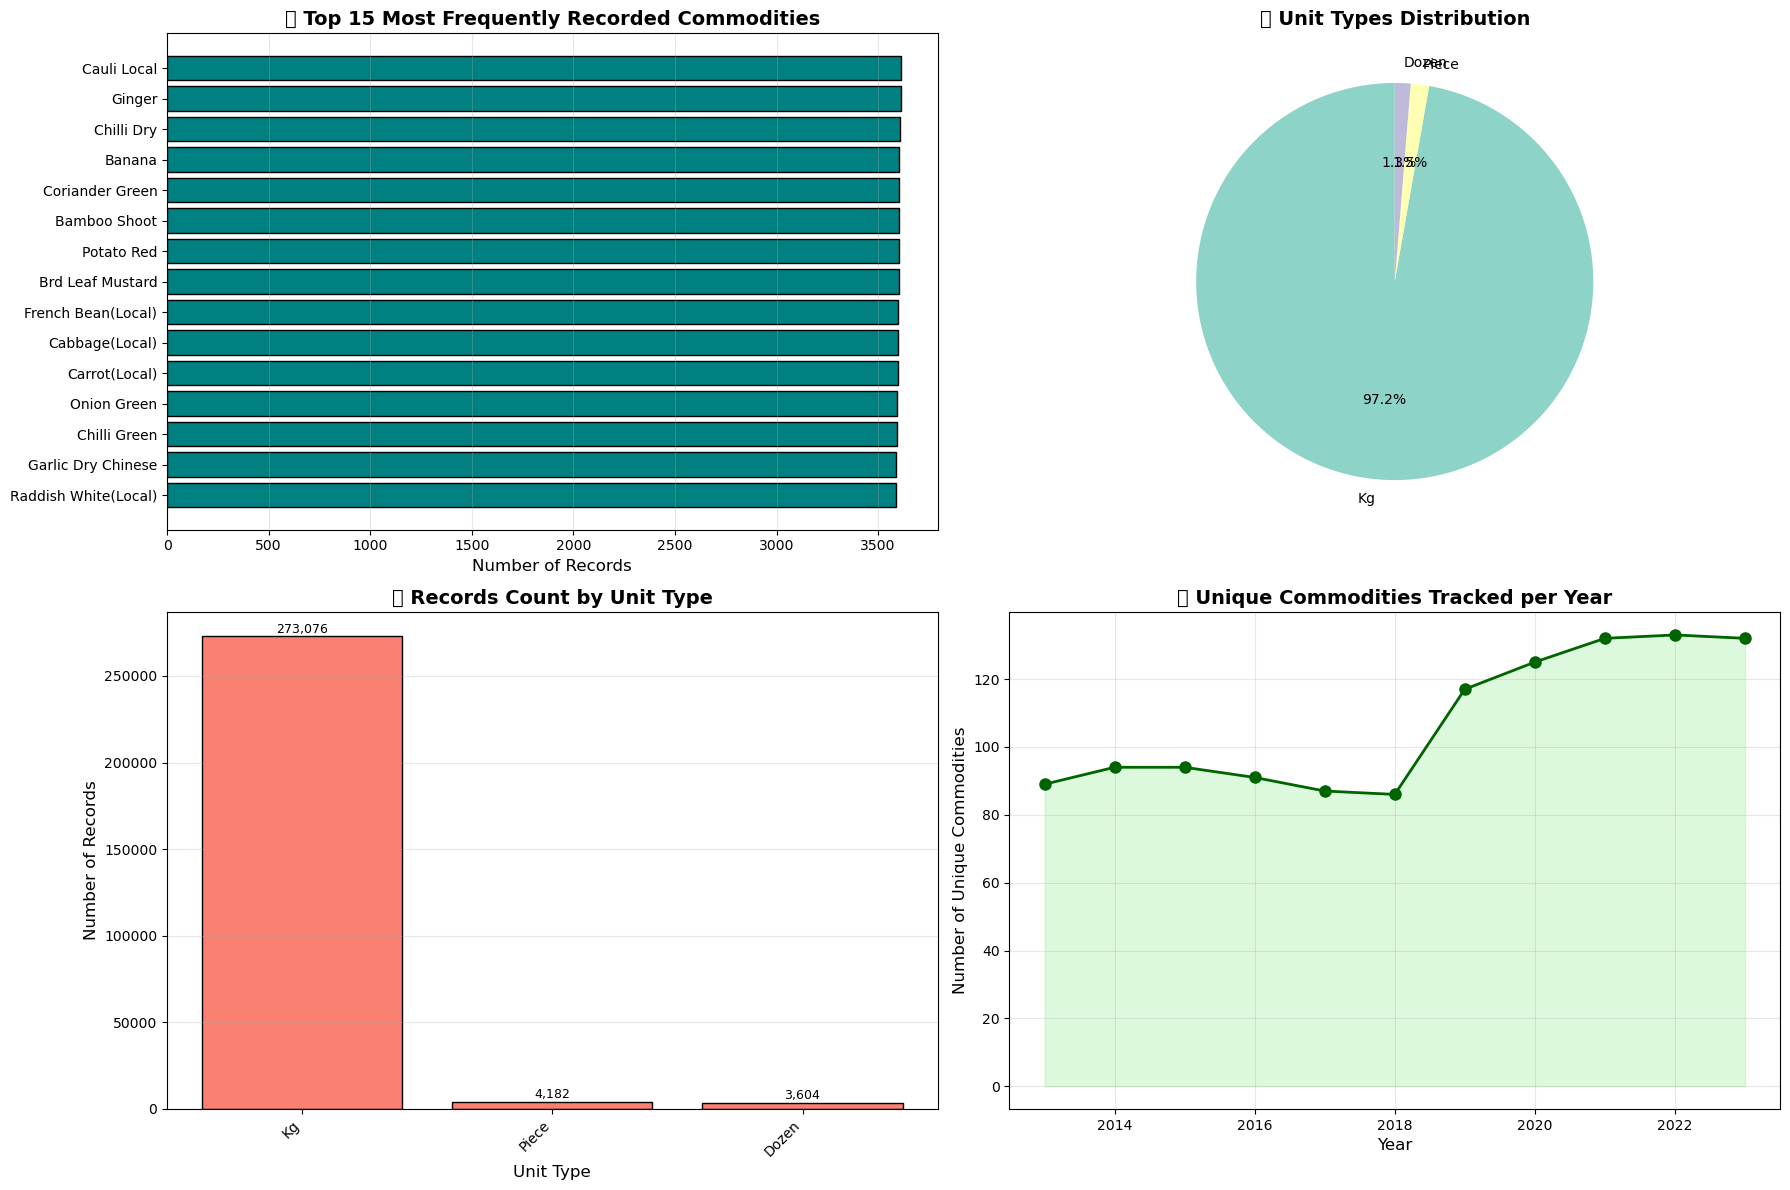

In [14]:
# Visualization 2: Commodity Analysis Charts
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Top 15 Commodities by Frequency
top_15_commodities = df['Commodity'].value_counts().head(15)
axes[0, 0].barh(range(len(top_15_commodities)), top_15_commodities.values, color='teal', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_15_commodities)))
axes[0, 0].set_yticklabels(top_15_commodities.index, fontsize=10)
axes[0, 0].set_title('🥬 Top 15 Most Frequently Recorded Commodities', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Records', fontsize=12)
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Unit Types Distribution
unit_counts = df['Unit'].value_counts()
colors_pie = plt.cm.Set3(range(len(unit_counts)))
axes[0, 1].pie(unit_counts.values, labels=unit_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors_pie, textprops={'fontsize': 10})
axes[0, 1].set_title('📦 Unit Types Distribution', fontsize=14, fontweight='bold')

# Plot 3: Commodity Count by Unit Type
axes[1, 0].bar(range(len(unit_counts)), unit_counts.values, color='salmon', edgecolor='black')
axes[1, 0].set_title('📊 Records Count by Unit Type', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Unit Type', fontsize=12)
axes[1, 0].set_ylabel('Number of Records', fontsize=12)
axes[1, 0].set_xticks(range(len(unit_counts)))
axes[1, 0].set_xticklabels(unit_counts.index, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(unit_counts.values):
    axes[1, 0].text(i, v + 2000, f'{v:,}', ha='center', fontsize=9)

# Plot 4: Number of Commodities per Year
commodities_per_year = df.groupby('Year')['Commodity'].nunique()
axes[1, 1].plot(commodities_per_year.index, commodities_per_year.values, 
                marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1, 1].fill_between(commodities_per_year.index, commodities_per_year.values, alpha=0.3, color='lightgreen')
axes[1, 1].set_title('📈 Unique Commodities Tracked per Year', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Number of Unique Commodities', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Price Analysis
print("=" * 100)
print("💰 PRICE ANALYSIS")
print("=" * 100)

# Overall price statistics
print(f"\n📊 Overall Price Statistics:")
print("-" * 100)
print(f"Average Minimum Price: ₨ {df['Minimum'].mean():.2f}")
print(f"Average Maximum Price: ₨ {df['Maximum'].mean():.2f}")
print(f"Average Price: ₨ {df['Average'].mean():.2f}")

print(f"\n📈 Price Range Statistics:")
df['Price_Range'] = df['Maximum'] - df['Minimum']
print(f"Average Price Range: ₨ {df['Price_Range'].mean():.2f}")
print(f"Median Price Range: ₨ {df['Price_Range'].median():.2f}")
print(f"Max Price Range: ₨ {df['Price_Range'].max():.2f}")

# Calculate price volatility (coefficient of variation)
df['Price_Volatility'] = (df['Price_Range'] / df['Average']) * 100

print(f"\n📊 Top 10 Commodities by Average Price:")
print("-" * 100)
top_priced = df.groupby('Commodity')['Average'].mean().sort_values(ascending=False).head(10)
for idx, (commodity, price) in enumerate(top_priced.items(), 1):
    print(f"{idx:2}. {commodity:30} - ₨ {price:.2f}")

print(f"\n📊 Top 10 Most Volatile Commodities (by price range):")
print("-" * 100)
most_volatile = df.groupby('Commodity')['Price_Volatility'].mean().sort_values(ascending=False).head(10)
for idx, (commodity, volatility) in enumerate(most_volatile.items(), 1):
    print(f"{idx:2}. {commodity:30} - {volatility:.2f}%")

💰 PRICE ANALYSIS

📊 Overall Price Statistics:
----------------------------------------------------------------------------------------------------
Average Minimum Price: ₨ 90.34
Average Maximum Price: ₨ 100.23
Average Price: ₨ 95.28

📈 Price Range Statistics:
Average Price Range: ₨ 9.89
Median Price Range: ₨ 10.00
Max Price Range: ₨ 590.00

📊 Top 10 Commodities by Average Price:
----------------------------------------------------------------------------------------------------
 1. Strawberry                     - ₨ 467.36
 2. Asparagus                      - ₨ 436.77
 3. Kiwi                           - ₨ 372.61
 4. Avocado                        - ₨ 371.75
 5. Mushroom(Button)               - ₨ 349.11
 6. Lime                           - ₨ 322.50
 7. Grapes(Black)                  - ₨ 286.64
 8. Fish Fresh(Rahu)               - ₨ 284.43
 9. Apple(Fuji)                    - ₨ 271.49
10. Chilli Dry                     - ₨ 258.29

📊 Top 10 Most Volatile Commodities (by price range):
---

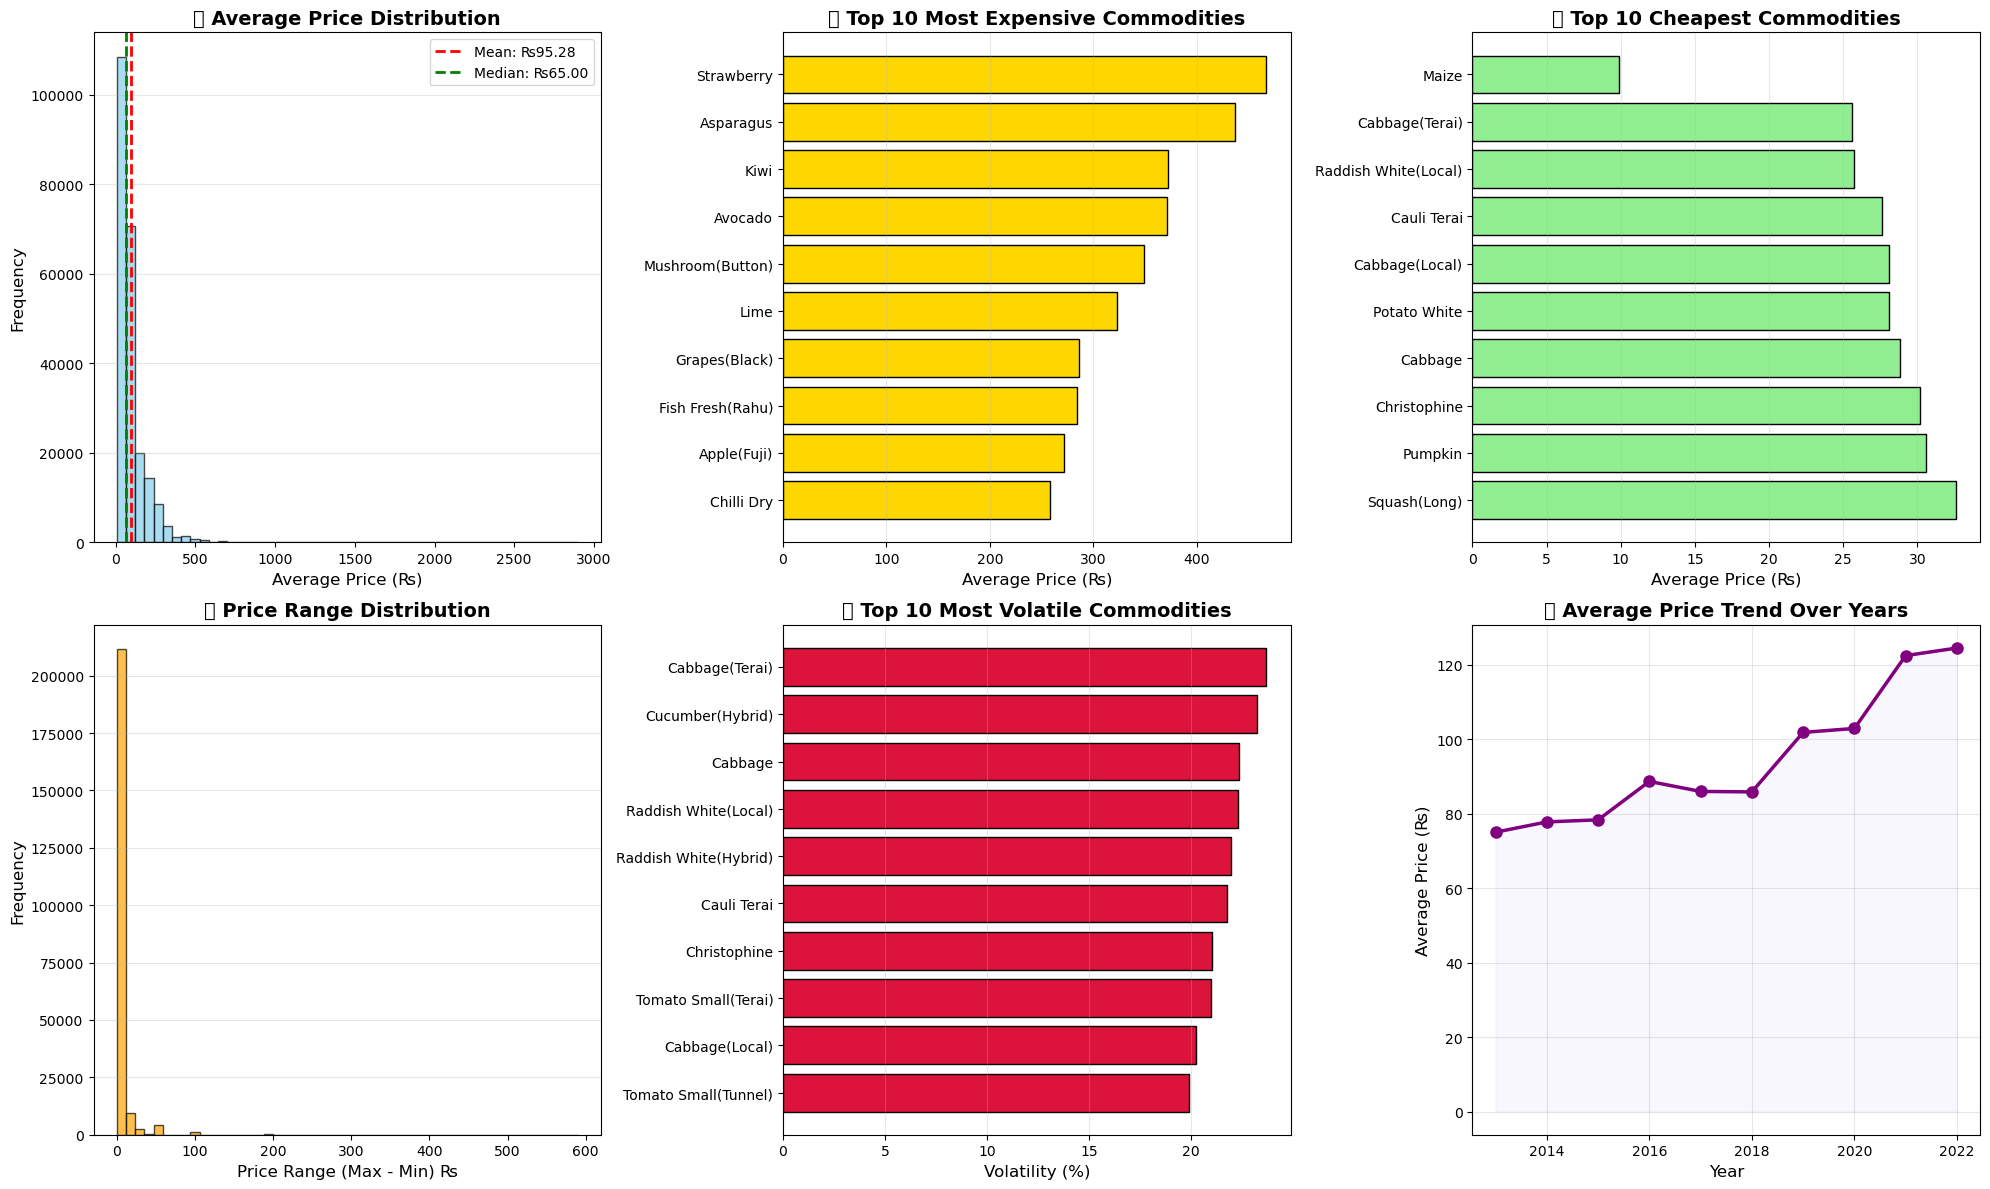

In [15]:
# Visualization 3: Price Analysis Charts
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot 1: Price Distribution
axes[0, 0].hist(df['Average'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('💰 Average Price Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Average Price (₨)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].axvline(df['Average'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ₨{df["Average"].mean():.2f}')
axes[0, 0].axvline(df['Average'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ₨{df["Average"].median():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Top 10 Most Expensive Commodities
top_priced = df.groupby('Commodity')['Average'].mean().sort_values(ascending=False).head(10)
axes[0, 1].barh(range(len(top_priced)), top_priced.values, color='gold', edgecolor='black')
axes[0, 1].set_yticks(range(len(top_priced)))
axes[0, 1].set_yticklabels(top_priced.index, fontsize=10)
axes[0, 1].set_title('💎 Top 10 Most Expensive Commodities', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Average Price (₨)', fontsize=12)
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Top 10 Cheapest Commodities
bottom_priced = df.groupby('Commodity')['Average'].mean().sort_values().head(10)
axes[0, 2].barh(range(len(bottom_priced)), bottom_priced.values, color='lightgreen', edgecolor='black')
axes[0, 2].set_yticks(range(len(bottom_priced)))
axes[0, 2].set_yticklabels(bottom_priced.index, fontsize=10)
axes[0, 2].set_title('💵 Top 10 Cheapest Commodities', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Average Price (₨)', fontsize=12)
axes[0, 2].invert_yaxis()
axes[0, 2].grid(axis='x', alpha=0.3)

# Plot 4: Price Range Distribution
df['Price_Range'] = df['Maximum'] - df['Minimum']
axes[1, 0].hist(df['Price_Range'].dropna(), bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('📊 Price Range Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Price Range (Max - Min) ₨', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 5: Top 10 Most Volatile Commodities
df['Price_Volatility'] = (df['Price_Range'] / df['Average']) * 100
most_volatile = df.groupby('Commodity')['Price_Volatility'].mean().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(most_volatile)), most_volatile.values, color='crimson', edgecolor='black')
axes[1, 1].set_yticks(range(len(most_volatile)))
axes[1, 1].set_yticklabels(most_volatile.index, fontsize=10)
axes[1, 1].set_title('📉 Top 10 Most Volatile Commodities', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Volatility (%)', fontsize=12)
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

# Plot 6: Average Price Over Years
avg_price_year = df.groupby('Year')['Average'].mean()
axes[1, 2].plot(avg_price_year.index, avg_price_year.values, 
                marker='o', linewidth=2.5, markersize=8, color='purple')
axes[1, 2].fill_between(avg_price_year.index, avg_price_year.values, alpha=0.3, color='lavender')
axes[1, 2].set_title('📈 Average Price Trend Over Years', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Year', fontsize=12)
axes[1, 2].set_ylabel('Average Price (₨)', fontsize=12)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 📈 Time Series Analysis - Individual Commodity Trends
Analyzing price trends for selected popular commodities over time.

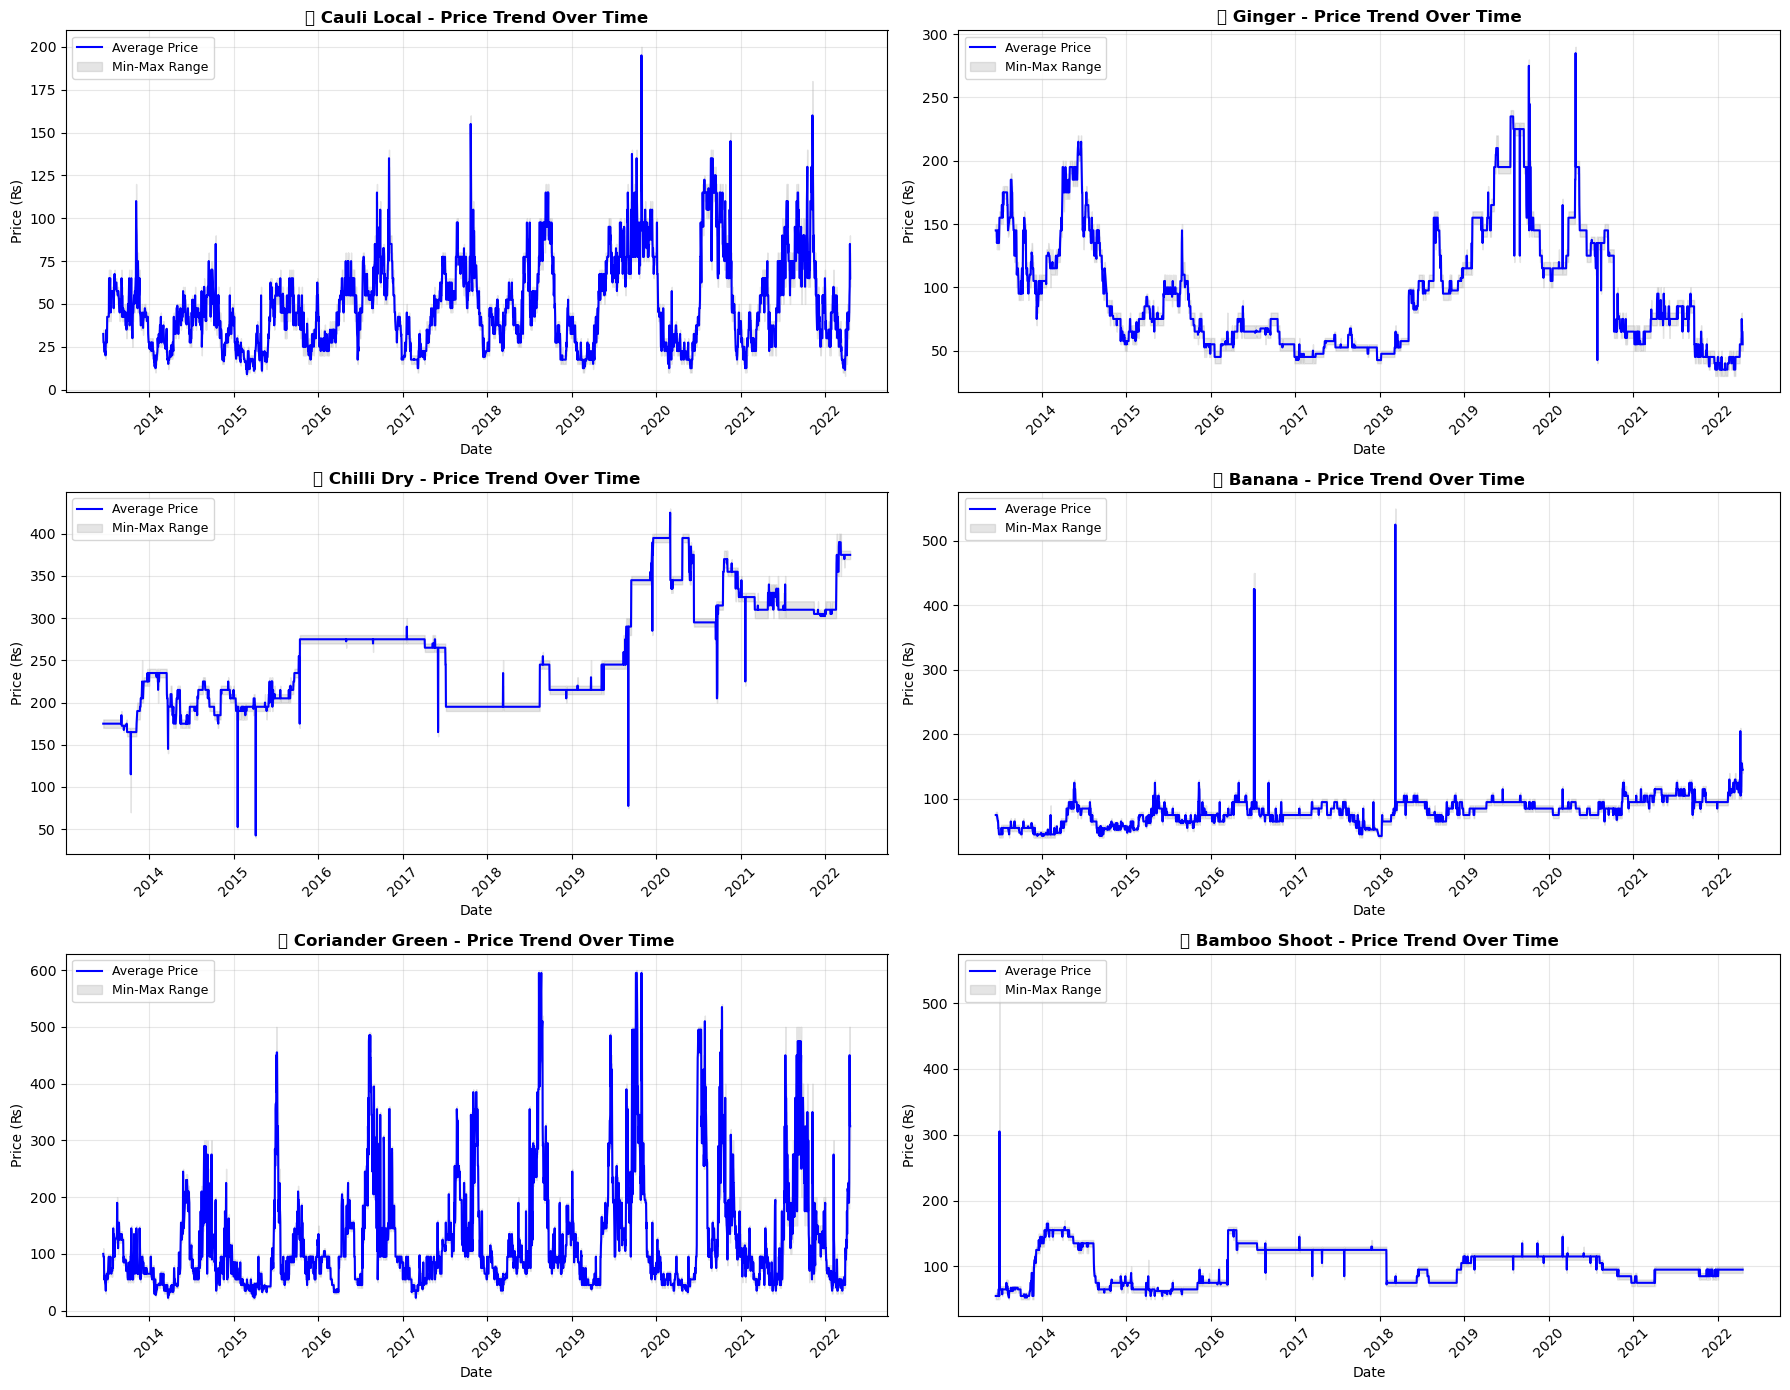

In [16]:
# Visualization 4: Time Series for Top 6 Commodities
# Select top 6 most frequently recorded commodities
top_6_commodities = df['Commodity'].value_counts().head(6).index

fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = axes.ravel()

for idx, commodity in enumerate(top_6_commodities):
    commodity_df = df[df['Commodity'] == commodity].copy()
    commodity_df = commodity_df.sort_values('Date')
    commodity_df = commodity_df.groupby('Date').agg({
        'Minimum': 'mean',
        'Maximum': 'mean',
        'Average': 'mean'
    }).reset_index()
    
    axes[idx].plot(commodity_df['Date'], commodity_df['Average'], 
                   linewidth=1.5, color='blue', label='Average Price')
    axes[idx].fill_between(commodity_df['Date'], 
                           commodity_df['Minimum'], 
                           commodity_df['Maximum'], 
                           alpha=0.2, color='gray', label='Min-Max Range')
    
    axes[idx].set_title(f'📊 {commodity} - Price Trend Over Time', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Date', fontsize=10)
    axes[idx].set_ylabel('Price (₨)', fontsize=10)
    axes[idx].legend(loc='upper left', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 🔥 Seasonal Patterns & Heatmaps
Exploring seasonal variations and patterns in commodity prices.

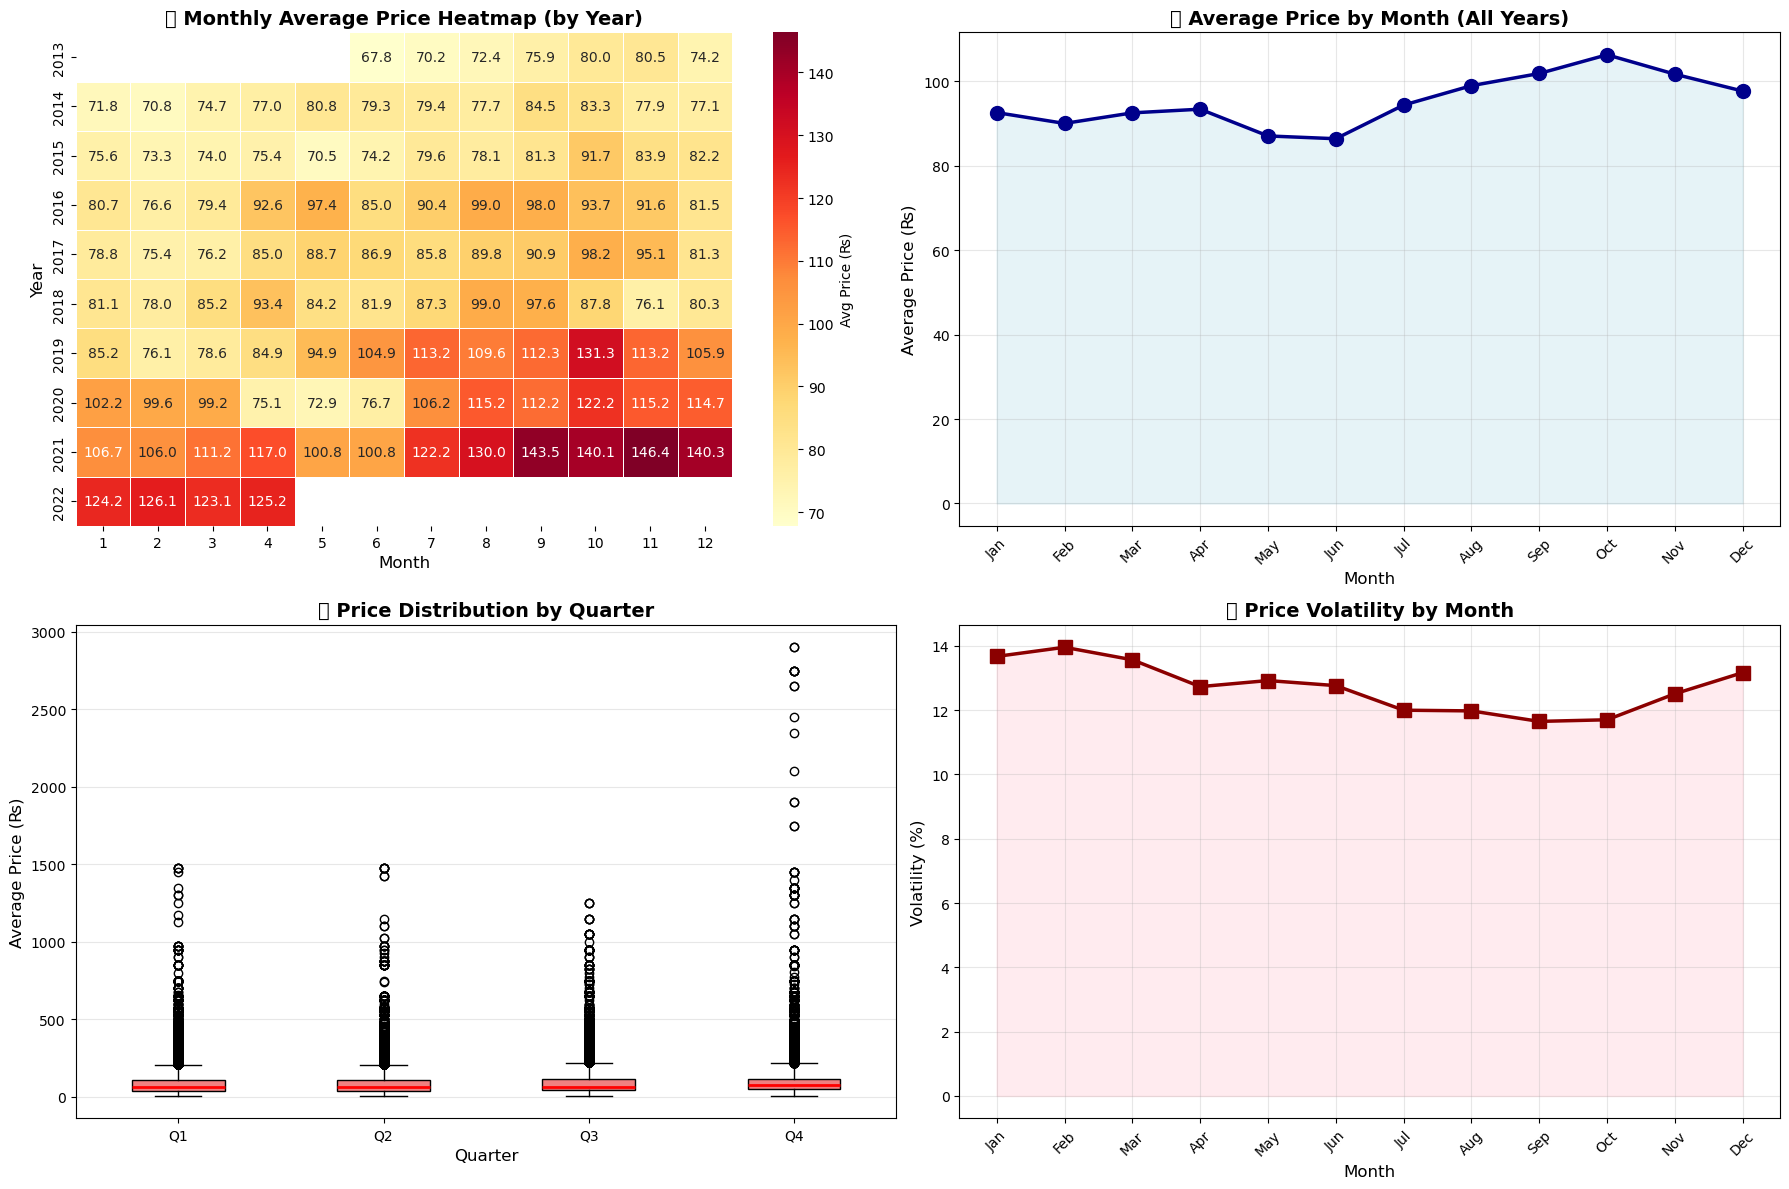

In [17]:
# Visualization 5: Seasonal Patterns and Heatmaps
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Monthly Average Price Heatmap by Year
monthly_avg = df.pivot_table(values='Average', index='Year', columns='Month', aggfunc='mean')
sns.heatmap(monthly_avg, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Avg Price (₨)'}, 
            ax=axes[0, 0], linewidths=0.5)
axes[0, 0].set_title('🔥 Monthly Average Price Heatmap (by Year)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month', fontsize=12)
axes[0, 0].set_ylabel('Year', fontsize=12)

# Plot 2: Average Price by Month (across all years)
monthly_price = df.groupby('Month_Name')['Average'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
axes[0, 1].plot(range(12), monthly_price.values, marker='o', linewidth=2.5, 
                markersize=10, color='darkblue')
axes[0, 1].fill_between(range(12), monthly_price.values, alpha=0.3, color='lightblue')
axes[0, 1].set_title('📅 Average Price by Month (All Years)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Average Price (₨)', fontsize=12)
axes[0, 1].set_xticks(range(12))
axes[0, 1].set_xticklabels([m[:3] for m in monthly_price.index], rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Box Plot - Price Distribution by Quarter
axes[1, 0].boxplot([df[df['Quarter'] == q]['Average'].dropna() for q in [1, 2, 3, 4]], 
                    tick_labels=['Q1', 'Q2', 'Q3', 'Q4'],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', color='black'),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'))
axes[1, 0].set_title('📦 Price Distribution by Quarter', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Quarter', fontsize=12)
axes[1, 0].set_ylabel('Average Price (₨)', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Line Plot - Price Volatility by Month
monthly_volatility = df.groupby('Month_Name')['Price_Volatility'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
axes[1, 1].plot(range(12), monthly_volatility.values, marker='s', linewidth=2.5, 
                markersize=10, color='darkred')
axes[1, 1].fill_between(range(12), monthly_volatility.values, alpha=0.3, color='pink')
axes[1, 1].set_title('📉 Price Volatility by Month', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Volatility (%)', fontsize=12)
axes[1, 1].set_xticks(range(12))
axes[1, 1].set_xticklabels([m[:3] for m in monthly_volatility.index], rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 🔍 Correlation & Relationship Analysis
Exploring relationships between different price metrics and time factors.

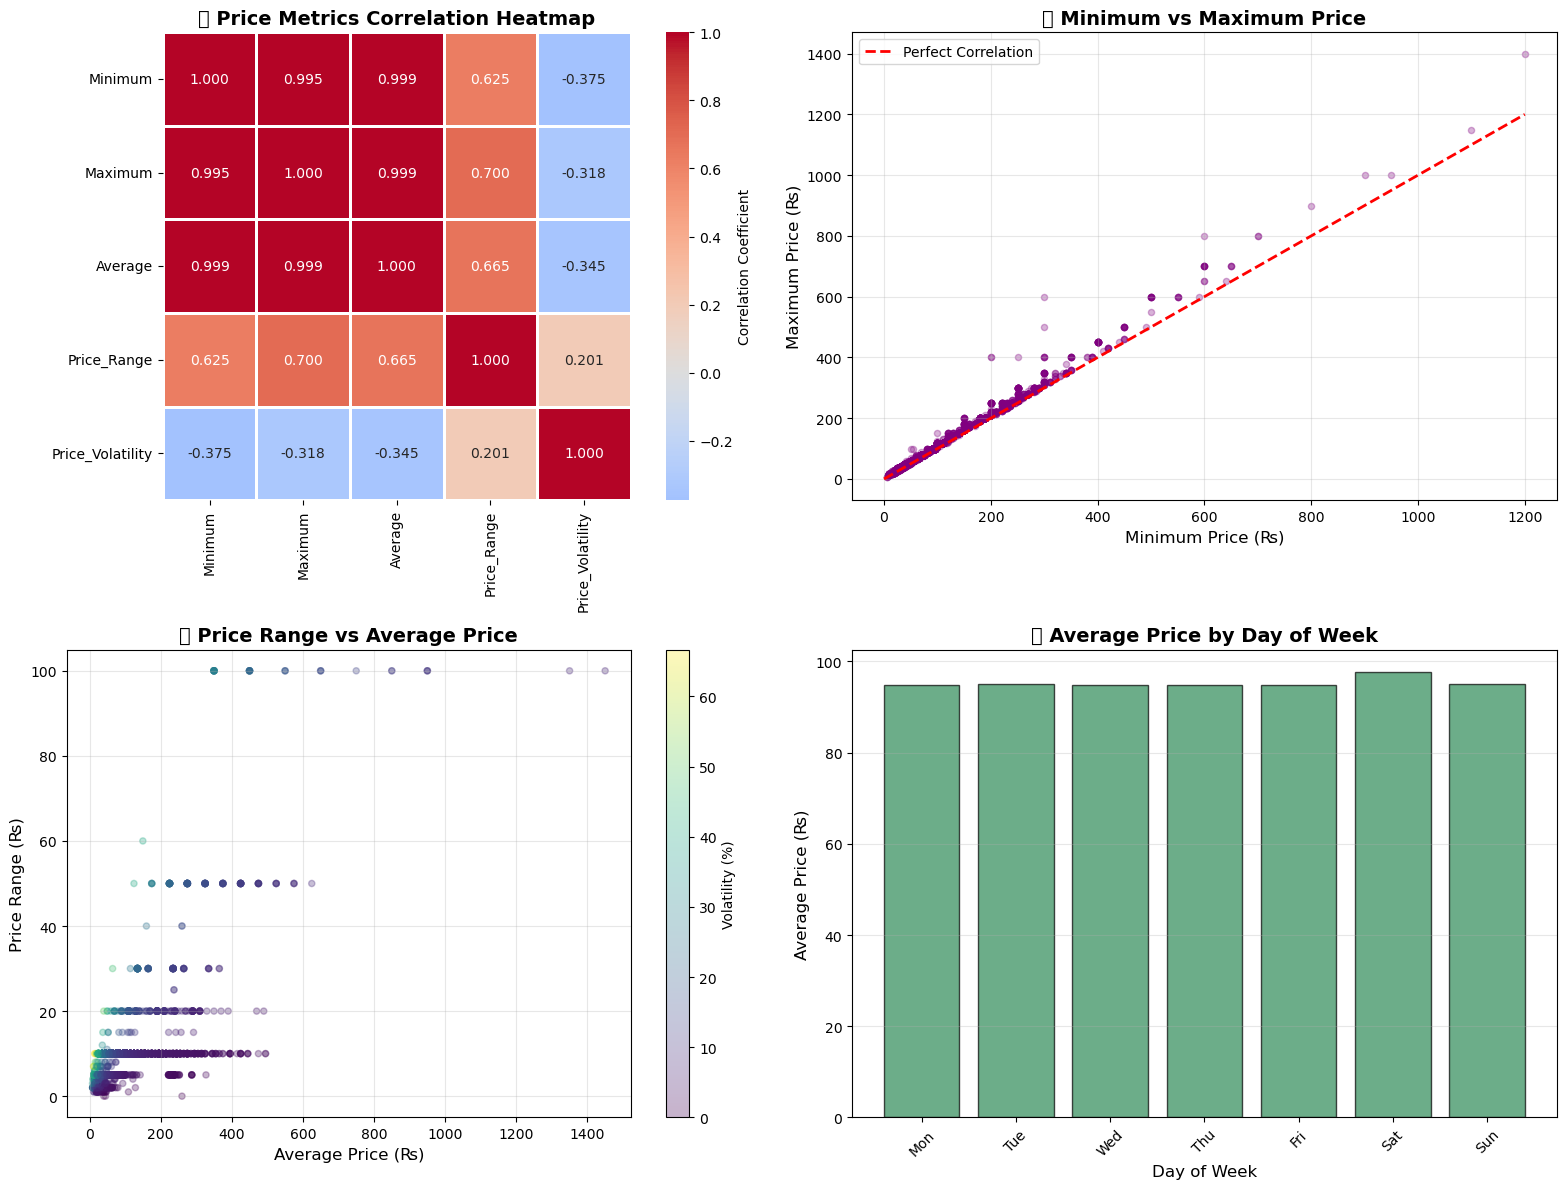

In [18]:
# Visualization 6: Correlation and Scatter Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Correlation Heatmap
correlation_cols = ['Minimum', 'Maximum', 'Average', 'Price_Range', 'Price_Volatility']
correlation_matrix = df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, ax=axes[0, 0], 
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=1)
axes[0, 0].set_title('🔥 Price Metrics Correlation Heatmap', fontsize=14, fontweight='bold')

# Plot 2: Scatter Plot - Minimum vs Maximum Price
sample_data = df.dropna(subset=['Minimum', 'Maximum']).sample(n=min(5000, len(df)))
axes[0, 1].scatter(sample_data['Minimum'], sample_data['Maximum'], 
                   alpha=0.3, s=20, c='purple')
axes[0, 1].plot([0, sample_data['Minimum'].max()], [0, sample_data['Minimum'].max()], 
                'r--', linewidth=2, label='Perfect Correlation')
axes[0, 1].set_title('📊 Minimum vs Maximum Price', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Minimum Price (₨)', fontsize=12)
axes[0, 1].set_ylabel('Maximum Price (₨)', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Price Range vs Average Price
sample_data2 = df.dropna(subset=['Average', 'Price_Range']).sample(n=min(5000, len(df)))
scatter = axes[1, 0].scatter(sample_data2['Average'], sample_data2['Price_Range'], 
                             alpha=0.3, s=20, c=sample_data2['Price_Volatility'], 
                             cmap='viridis')
axes[1, 0].set_title('💰 Price Range vs Average Price', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Average Price (₨)', fontsize=12)
axes[1, 0].set_ylabel('Price Range (₨)', fontsize=12)
plt.colorbar(scatter, ax=axes[1, 0], label='Volatility (%)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Average Price by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_price = df.groupby('Day_of_Week')['Average'].mean().reindex(day_order)
axes[1, 1].bar(range(7), day_price.values, color='seagreen', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('📆 Average Price by Day of Week', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week', fontsize=12)
axes[1, 1].set_ylabel('Average Price (₨)', fontsize=12)
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels([d[:3] for d in day_order], rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---

## 📝 Summary

Congratulations! You've successfully completed the comprehensive Time Series Analysis workflow with **rich visualizations**:

✅ **Step 1: Data Collection** - Loaded the Kalimati Tarkari dataset  
✅ **Step 2: Datetime Handling** - Converted dates and extracted temporal features  
✅ **Step 3: Initial Data Inspection** - Explored data structure and characteristics  
✅ **Step 4: Missing Values Check** - Identified temporal gaps and missing data  
✅ **Step 5: Resampling** - Analyzed frequency and resampling options  
✅ **Step 6: Exploratory Data Analysis** - Discovered patterns with **20+ visualizations**:
   - 📊 Temporal distribution charts (yearly, monthly, daily patterns)
   - 🥬 Commodity analysis (frequency, units, trends over time)
   - 💰 Price analysis (distributions, top/bottom commodities, volatility)
   - 📈 Time series trends (6 popular commodities tracked over 10 years)
   - 🔥 Seasonal patterns (heatmaps, monthly/quarterly analysis)
   - 🔍 Correlation analysis (price relationships, scatter plots)

### 🎯 Key Findings:

- **Dataset Coverage**: 10+ years of daily price data (2013-2023)
- **Scale**: 280,862 records across 136 commodities
- **Temporal Coverage**: 3,615 unique dates with 142 missing dates
- **Most Expensive**: Strawberry (₨467), Asparagus (₨437), Kiwi (₨373)
- **Cheapest**: Maize (₨4), Cabbage variants (₨13-15)
- **Most Volatile**: Cabbage(Terai), Cucumber(Hybrid), showing 20%+ price swings
- **Seasonal Pattern**: Prices peak in October-November, dip in May-June
- **Growth Trend**: Average prices increased from ₨76 (2013) to ₨124 (2022)

### 📊 Visualization Highlights:

- **4 Temporal Charts**: Year, month, day of week, quarter distributions
- **4 Commodity Charts**: Top commodities, unit types, tracking trends
- **6 Price Charts**: Distributions, expensive/cheap items, volatility, trends
- **6 Time Series Plots**: Individual commodity price movements over time
- **4 Seasonal Charts**: Heatmaps, monthly/quarterly patterns
- **4 Correlation Charts**: Price relationships and scatter analysis

### 🚀 Next Steps:

You can now proceed with:
- **Advanced Time Series Modeling**: ARIMA, SARIMA, Prophet forecasting
- **Machine Learning**: Price prediction using regression/neural networks
- **Anomaly Detection**: Identifying unusual price spikes
- **Interactive Dashboards**: Creating dynamic visualizations with Plotly/Streamlit
- **Comparative Analysis**: Studying relationships between commodities
- **Economic Insights**: Impact of festivals, seasons, and events on prices

---

**Happy Analyzing! 📊✨**